In this project we will create a Convolutional Neural Network which will be able to predict whether a plant is suffering from a disease. We will use different layers and other hyperparameters for building, training and testing this classifictaion model.We will be using tensorflow and keras for this project.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical


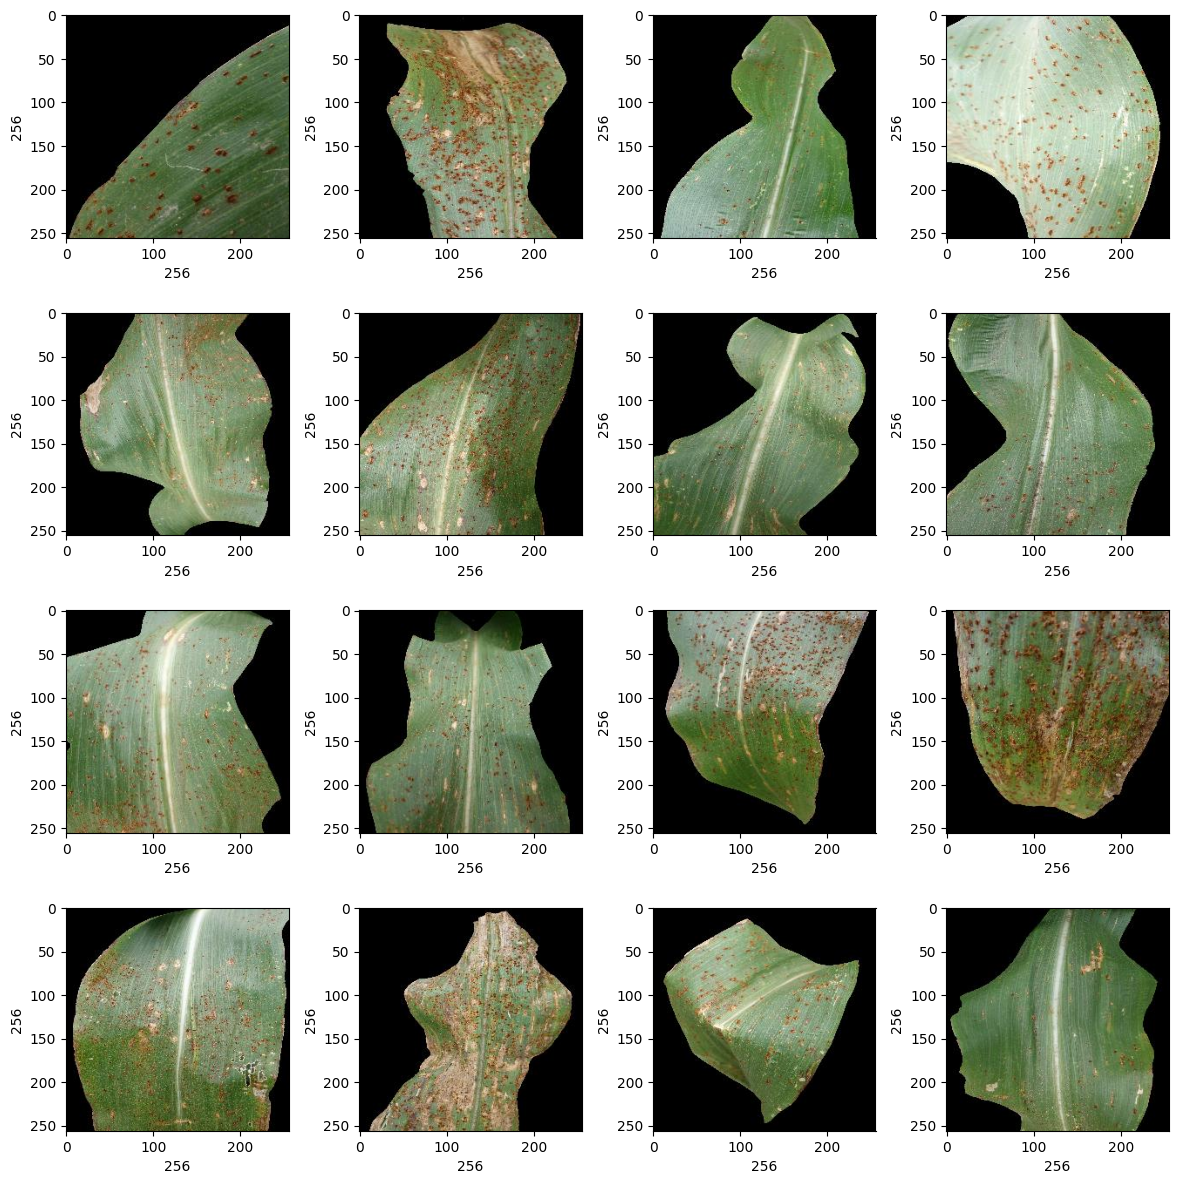

In [ ]:
# Plotting 12 images to check dataset
#Now we will observe some of the iamges that are their in our dataset. We will plot 12 images here using the matplotlib library.
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/DL project/Plant_images/Corn_(maize)___Common_rust_"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

After visualizing the images let us move forward and create a function which will convert the images into a numpy array. It is required because we will normalize our dataset after this.

In [ ]:
#Converting Images to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
dir = "/content/drive/MyDrive/DL project/Plant_images"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
#Now we will convert all the images into numpy array.

for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])



Now we will convert all the images into numpy array.


In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

#it is a balanced dataset as you can see

,count
0,
0,301
1,300
2,300


In [ ]:
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers

image_size = (256, 256)

image_list_resized = []
for img in image_list:
    if img is not None:
        if img.size != 0:
            resized_img = cv2.resize(img, image_size)
            image_list_resized.append(resized_img)
        else:
            print("Warning: Encountered an empty image!")
    else:
        print("Warning: Encountered a None image!")

image_list_resized = []
label_list_filtered = []

for img, label in zip(image_list, label_list):
    if img is not None and img.size != 0:
        resized_img = cv2.resize(img, image_size)
        image_list_resized.append(resized_img)
        label_list_filtered.append(label)
    else:
        print(f"Warning: Skipping invalid image with label {label}")

image_list_resized = np.array(image_list_resized)
label_list_filtered = np.array(label_list_filtered)

print(f"Number of valid images: {len(image_list_resized)}")
print(f"Number of valid labels: {len(label_list_filtered)}")

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(image_list_resized, label_list_filtered, test_size=0.2, random_state=10)

# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding for labels
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


# Define the model
model = models.Sequential()

# 1st Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the last convolutional layer
model.add(layers.Flatten())

# Dense Layer
model.add(layers.Dense(128, activation='relu'))

# Output layer for classification (assuming 3 classes)
model.add(layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary to check the output shapes and layers
model.summary()

# Training the model
epochs = 10
batch_size = 128

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
                    validation_data=(x_test, y_test))


Number of valid images: 900
Number of valid labels: 900


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,363 (56.61 MB)

 Trainable params: 14,839,363 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 126s 20s/step - accuracy: 0.4154 - loss: 2.2719 - val_accuracy: 0.7722 - val_loss: 0.8113
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 134s 20s/step - accuracy: 0.7061 - loss: 0.7270 - val_accuracy: 0.9722 - val_loss: 0.3291
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 148s 20s/step - accuracy: 0.9401 - loss: 0.2775 - val_accuracy: 0.9667 - val_loss: 0.0929
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 139s 20s/step - accuracy: 0.9669 - loss: 0.1039 - val_accuracy: 1.0000 - val_loss: 0.0167
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 117s 20s/step - accuracy: 0.9917 - loss: 0.0403 - val_accuracy: 0.9944 - val_loss: 0.0119
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 144s 20s/step - accuracy: 0.9939 - loss: 0.0312 - val_accuracy: 0.9944 - val_loss: 0.0084
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 141s 20s/step - accuracy: 0.9973 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 144s 20s/step - accuracy: 0.9994 - loss: 0.0097 - val_accuracy: 1.0000 - val_loss:

In [ ]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


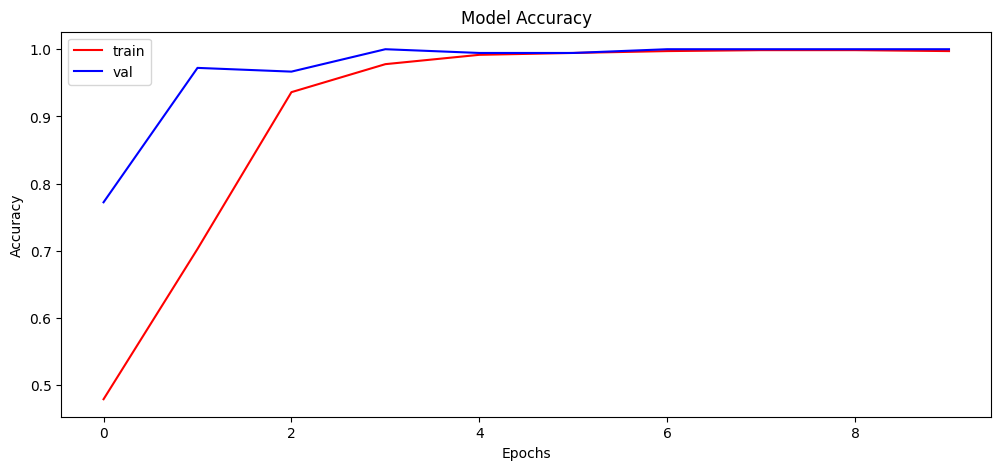

In [ ]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

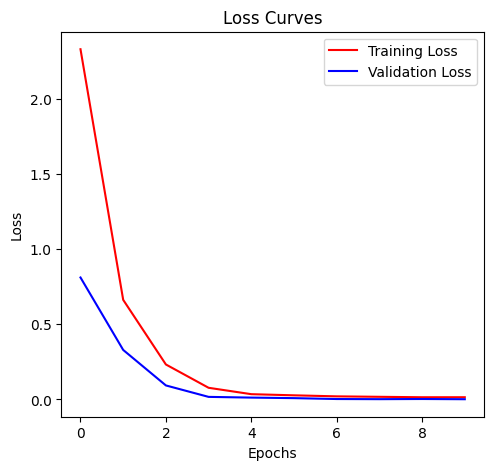

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='r')
plt.plot(history.history['val_loss'], label='Validation Loss', color='b')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 8s/step - accuracy: 0.3372 - loss: 1.1183 - val_accuracy: 0.3281 - val_loss: 1.1066
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 8s/step - accuracy: 0.2966 - loss: 1.1009 - val_accuracy: 0.3672 - val_loss: 1.0986
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 8s/step - accuracy: 0.3156 - loss: 1.0986 - val_accuracy: 0.3672 - val_loss: 1.0986
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 44s 9s/step - accuracy: 0.3190 - loss: 1.0986 - val_accuracy: 0.3281 - val_loss: 1.0986
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 8s/step - accuracy: 0.3711 - loss: 1.0986 - val_accuracy: 0.3281 - val_loss: 1.0986
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 507ms/step


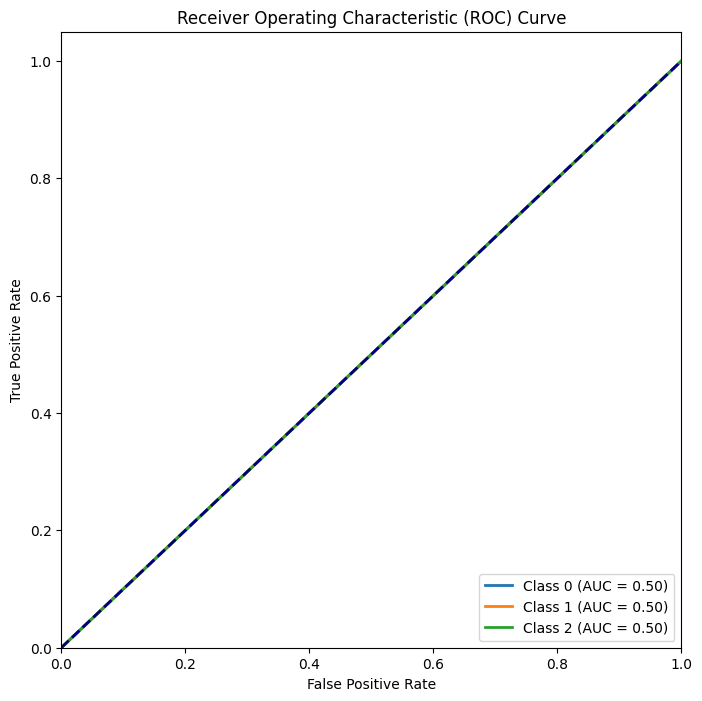

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import img_to_array
import cv2

np.random.seed(42)
x_train = np.random.rand(800, 256, 256, 3)  # Replace with your actual training data
y_train = np.random.randint(0, 3, 800)  # Replace with your actual training labels

# Convert labels to binary format
y_train_binary = label_binarize(y_train, classes=[0, 1, 2])

# Split the dataset
x_train, x_test, y_train_binary, y_test = train_test_split(x_train, y_train_binary, test_size=0.2, random_state=42)

# Build a simple CNN model (similar to your model architecture)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

# Train the model (replace with your actual training code)
epochs = 5
batch_size = 128
history = model.fit(x_train, y_train_binary, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):  # Assuming 3 classes, modify accordingly
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 8))

for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
y_pred = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 609ms/step


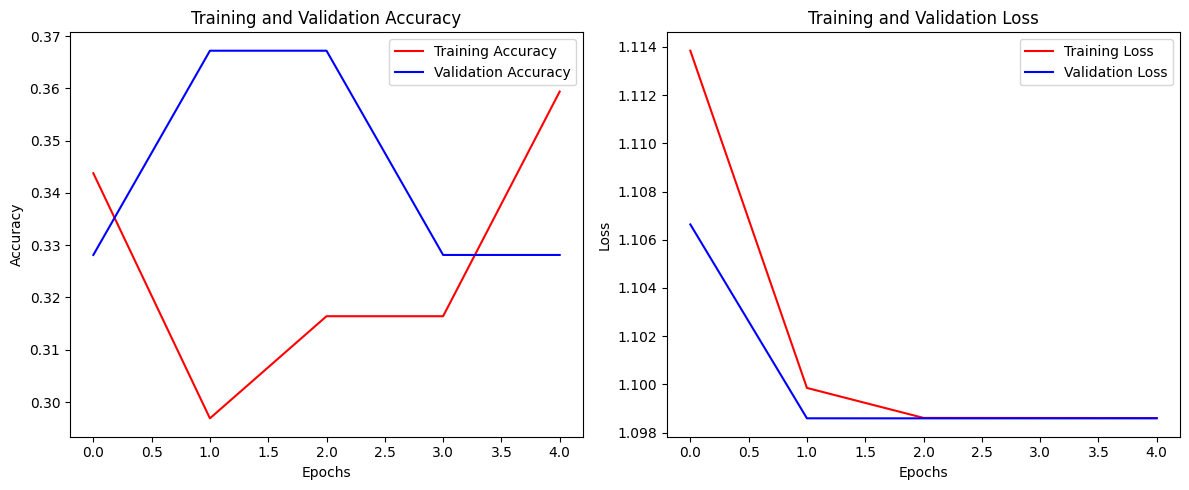

Optimizer Used: Adam
Number of Epochs: 50
Batch Size: 128


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable containing training history from the model.fit() function

# Plotting accuracy and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='r', label='Training Loss')
plt.plot(history.history['val_loss'], color='b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Displaying other information
print("Optimizer Used: Adam")
print("Number of Epochs: 50")
print("Batch Size: 128")


In [ ]:
model.save('plant_disease.h5')

In [ ]:
# Save the model in the new Keras format (.keras)
model.save('my_model.keras')


In [ ]:
import pickle

# Save model architecture and weights separately
model_json = model.to_json()  # Serialize the architecture
model_weights = model.get_weights()  # Get the weights

# Save both the architecture and weights to a pickle file
with open('model_architecture.pkl', 'wb') as json_file:
    pickle.dump(model_json, json_file)

with open('model_weights.pkl', 'wb') as weights_file:
    pickle.dump(model_weights, weights_file)


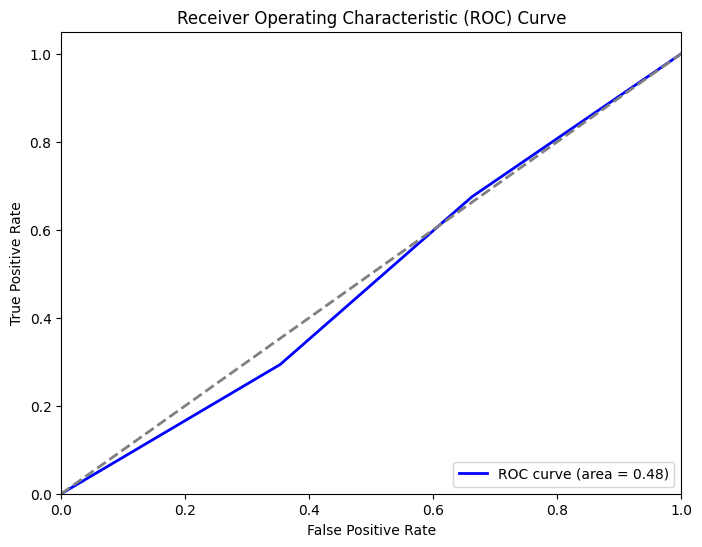

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test is one-hot encoded and y_pred are the predicted probabilities
fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Resize the input image to the expected shape (256x256)
img_path = '/content/RS_Rust 2469.JPG'  # Replace with your image path
img = cv2.imread(img_path)

# Resize the image to match the model's expected input size
img_resized = cv2.resize(img, (256, 256))

# Preprocess the image (convert to array, normalize, etc.)
img_array = np.expand_dims(img_resized, axis=0)  # Add batch dimension (1, 256, 256, 3)
img_array = img_array.astype('float32') / 255.0  # Normalize the image

# Make the prediction
predictions = model.predict(img_array)

# Get the predicted class (index of the highest probability)
# List of class names corresponding to the model's output indices
class_names = ['Corn common rust','Potato Early blight', ' Tomato bacterial spot' ]  # Modify these class names as per your dataset

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index[0]]

# Output the predicted class name
print("Predicted Class Name:", predicted_class_name)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Class Name:  Tomato bacterial spot


In [ ]:
model.save('plant_disease.h5')

In [ ]:
# Save the model in the new Keras format (.keras)
model.save('my_model.keras')